# Decision Tree

<img src='dt.png' />

In [ ]:
the game

https://en.akinator.com/

In [ ]:
- node   -> features
- branch -> outcome of that decision
- leaf nodes(no further child) -> final prediction

In [ ]:
degree of disorder -> entropy

In [ ]:
        0111          ---------- root node
      /      \
    01        11  -------------- decision nodes
  /    \
 0      1  -----------  terminal nodes

In [ ]:
- gini index/impurity  -> [0,1] -> 0 = all the elements belong to a certain class
- information gain -> best nodes that returns highest information gain

In [ ]:
real world applications

- customer churn prediction -> usage pattern, demographics
- medical diagnosis
- credit scoring
- fraud detection

In [4]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('datasets/salaries.csv')

df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
salary_df = df.drop('salary_more_then_100k', axis='columns')

salary_df

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [4]:
target = df['salary_more_then_100k']

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [7]:
# help(le)

In [8]:
salary_df['company_number'] = le.fit_transform(salary_df['company'])
salary_df['job_number'] = le.fit_transform(salary_df['job'])
salary_df['degree_number'] = le.fit_transform(salary_df['degree'])

In [10]:
salary_df

,company,job,degree,company_number,job_number,degree_number
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [11]:
salary_df = salary_df.drop(['company', 'job', 'degree'], axis='columns')

salary_df

,company_number,job_number,degree_number
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [12]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(salary_df, target)

DecisionTreeClassifier()

In [14]:
model.score(salary_df, target)

1.0

In [15]:
model.predict([[2,1,0]])

C:\Users\himan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# Preprocessing with Label Encoder

In [16]:
le = LabelEncoder()

le.fit([1,2,2,6])

LabelEncoder()

In [17]:
le.classes_

array([1, 2, 6])

In [18]:
le.transform([1,1,2,6])

array([0, 0, 1, 2], dtype=int64)

In [19]:
le.inverse_transform([2])

array([6])

In [20]:
le.fit(['paris', 'paris', 'goa', 'mumbai'])

LabelEncoder()

In [21]:
le.transform(['goa', 'goa', 'paris'])

array([0, 0, 2])

In [22]:
le.inverse_transform([0, 2])

array(['goa', 'paris'], dtype='<U6')

In [23]:
le.transform(['goa', 'mumbai', 'paris'])

array([0, 1, 2])

In [24]:
le.inverse_transform([2])

array(['paris'], dtype='<U6')

# Income Prediction

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('datasets/adult_dataset.csv')

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
NULL -> placeholder  # NULL -> None

NaN -> not a number

SyntaxError: invalid syntax (1121407070.py, line 1)

In [10]:
df1 = df[df.workclass != '?']

df1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [11]:
df = df[df.workclass != '?']

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [12]:
df_categorical = df.select_dtypes(include=['object'])

df_categorical.apply(lambda x: x == '?', axis=0).sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

In [13]:
df = df[df.occupation != '?']

df = df[df['native.country'] != '?']

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


# label encoding

In [15]:
df_categorical = df.select_dtypes(include=['object'])

df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_categorical = df_categorical.apply(le.fit_transform)

df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0


In [17]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [18]:
df = df.drop(df_categorical.columns, axis=1)

df = pd.concat([df, df_categorical], axis=1)

df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38,0
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38,0
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38,0
5,34,216864,9,0,3770,45,2,11,0,7,4,4,0,38,0
6,38,150601,6,0,3770,40,2,0,5,0,4,4,1,38,0


In [19]:
df['income'] = df['income'].astype('category')
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38,0
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38,0
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38,0
5,34,216864,9,0,3770,45,2,11,0,7,4,4,0,38,0
6,38,150601,6,0,3770,40,2,0,5,0,4,4,1,38,0


In [20]:
from sklearn.model_selection import train_test_split

x = df.drop('income', axis=1)

y = df['income']

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=101)

In [21]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5)

model.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

ypred = model.predict(xtest)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      6776
           1       0.79      0.50      0.61      2273

    accuracy                           0.84      9049
   macro avg       0.82      0.73      0.76      9049
weighted avg       0.84      0.84      0.83      9049



In [23]:
print(confusion_matrix(ytest, ypred))

[[6467  309]
 [1128 1145]]


# Hyperparameter Tuning


In [27]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

In [24]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': range(1,40)}

dtree = DecisionTreeClassifier(criterion='gini', random_state=110)

gs = GridSearchCV(dtree, parameters, cv=5, scoring='accuracy')

gs.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=110),
             param_grid={'max_depth': range(1, 40)}, scoring='accuracy')

In [25]:
scores = gs.cv_results_

scores = pd.DataFrame(scores)

scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023449,0.009822,0.003335,0.001082,1,{'max_depth': 1},0.752072,0.752072,0.752072,0.752013,0.752013,0.752048,0.000029,39
1,0.024544,0.002597,0.003205,0.000509,2,{'max_depth': 2},0.817665,0.825716,0.822401,0.822596,0.825675,0.822811,0.002944,16
2,0.041154,0.007099,0.003324,0.000755,3,{'max_depth': 3},0.833531,0.839451,0.836135,0.835149,0.841544,0.837162,0.002923,12
3,0.042408,0.003451,0.003712,0.000597,4,{'max_depth': 4},0.837083,0.844423,0.841819,0.841071,0.844387,0.841756,0.002696,9
4,0.050987,0.004704,0.004340,0.000955,5,{'max_depth': 5},0.838030,0.843713,0.843950,0.842729,0.847229,0.843130,0.002966,8
5,0.065611,0.004461,0.005334,0.001690,6,{'max_depth': 6},0.844660,0.845371,0.848212,0.846518,0.851492,0.847251,0.002437,5
6,0.073892,0.010444,0.004161,0.000721,7,{'max_depth': 7},0.846791,0.852001,0.850817,0.849834,0.852203,0.850329,0.001965,1
7,0.090323,0.023747,0.004223,0.001490,8,{'max_depth': 8},0.844660,0.853422,0.852711,0.846045,0.851018,0.849571,0.003559,2
8,0.082951,0.004637,0.003817,0.000744,9,{'max_depth': 9},0.847975,0.853895,0.850580,0.842965,0.852440,0.849571,0.003850,3
9,0.102703,0.003586,0.003908,0.001213,10,{'max_depth': 10},0.843476,0.850817,0.846318,0.839413,0.857887,0.847582,0.006354,4


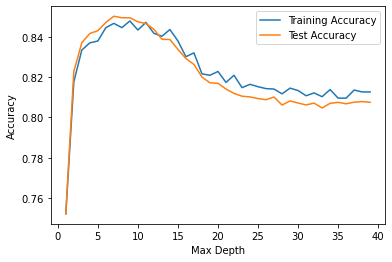

In [26]:
plt.plot(scores['param_max_depth'], scores['split0_test_score'], label='Training Accuracy')
plt.plot(scores['param_max_depth'], scores['mean_test_score'], label='Test Accuracy')

plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

In [62]:
# help(DecisionTreeClassifier)

In [ ]:
min_samples_leaf
min_samples_split
criterion

# Assignment

https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees/data

# Day 23

Hyperparameter Tuning continue


In [28]:
from sklearn.model_selection import GridSearchCV

parameters = {'min_samples_leaf': range(5,200,20)}

dtree = DecisionTreeClassifier(criterion='gini', random_state=110)

gs = GridSearchCV(dtree, parameters, cv=5, scoring='accuracy')

gs.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=110),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             scoring='accuracy')

In [29]:
scores = gs.cv_results_

scores = pd.DataFrame(scores)

scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.118835,0.021311,0.009669,0.009521,5,{'min_samples_leaf': 5},0.828321,0.821217,0.826664,0.817385,0.831360,0.824989,0.005031,10
1,0.104472,0.025401,0.004907,0.001457,25,{'min_samples_leaf': 25},0.848212,0.844423,0.845134,0.841781,0.851018,0.846114,0.003195,8
2,0.112106,0.015118,0.005301,0.001122,45,{'min_samples_leaf': 45},0.849396,0.850343,0.840161,0.848413,0.854098,0.848482,0.004584,5
3,0.120748,0.015788,0.006541,0.002704,65,{'min_samples_leaf': 65},0.849159,0.852948,0.845134,0.850308,0.856229,0.850756,0.003718,1
4,0.129252,0.016894,0.006232,0.003287,85,{'min_samples_leaf': 85},0.850107,0.849159,0.844423,0.846518,0.855756,0.849193,0.003842,4
5,0.127538,0.032192,0.005721,0.001302,105,{'min_samples_leaf': 105},0.851291,0.852475,0.844897,0.847703,0.853150,0.849903,0.003130,3
6,0.125217,0.022912,0.006169,0.000866,125,{'min_samples_leaf': 125},0.849396,0.853659,0.843476,0.847229,0.855756,0.849903,0.004406,2
7,0.098254,0.010634,0.004923,0.001259,145,{'min_samples_leaf': 145},0.846318,0.851764,0.843239,0.844623,0.851966,0.847582,0.003631,6
8,0.085697,0.008409,0.004220,0.000928,165,{'min_samples_leaf': 165},0.848449,0.850343,0.844187,0.840123,0.850545,0.846729,0.004017,7
9,0.087691,0.004736,0.005141,0.000971,185,{'min_samples_leaf': 185},0.838740,0.849396,0.841582,0.839886,0.851018,0.844125,0.005074,9


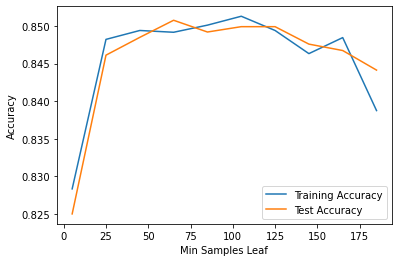

In [30]:
plt.plot(scores['param_min_samples_leaf'], scores['split0_test_score'], label='Training Accuracy')
plt.plot(scores['param_min_samples_leaf'], scores['mean_test_score'], label='Test Accuracy')

plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV

parameters = {'min_samples_split': range(5,200,20)}

dtree = DecisionTreeClassifier(criterion='gini', random_state=110)

gs = GridSearchCV(dtree, parameters, cv=5, scoring='accuracy')

gs.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=110),
             param_grid={'min_samples_split': range(5, 200, 20)},
             scoring='accuracy')

In [32]:
scores = gs.cv_results_

scores = pd.DataFrame(scores)

scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.119727,0.005736,0.004331,0.000685,5,{'min_samples_split': 5},0.818139,0.802984,0.811508,0.807911,0.819043,0.811917,0.006091,10
1,0.189246,0.045496,0.008364,0.005134,25,{'min_samples_split': 25},0.828084,0.829742,0.825006,0.822833,0.840834,0.829300,0.006244,9
2,0.154836,0.011409,0.004703,0.000881,45,{'min_samples_split': 45},0.837083,0.837793,0.829742,0.832070,0.843913,0.836120,0.004930,8
3,0.190559,0.037210,0.008547,0.003763,65,{'min_samples_split': 65},0.845371,0.841345,0.834241,0.834912,0.845334,0.840241,0.004855,7
4,0.176617,0.017721,0.005214,0.002033,85,{'min_samples_split': 85},0.848212,0.843239,0.838030,0.839649,0.854334,0.844693,0.005955,6
5,0.144579,0.018472,0.005929,0.001661,105,{'min_samples_split': 105},0.849870,0.849159,0.845607,0.841071,0.854334,0.848008,0.004443,5
6,0.139493,0.015195,0.006397,0.001497,125,{'min_samples_split': 125},0.849396,0.847028,0.846791,0.843202,0.856466,0.848577,0.004413,2
7,0.111708,0.010001,0.005691,0.002459,145,{'min_samples_split': 145},0.848923,0.847028,0.849396,0.842018,0.856703,0.848814,0.004732,1
8,0.098223,0.010549,0.004263,0.001091,165,{'min_samples_split': 165},0.848923,0.846791,0.847265,0.841781,0.856466,0.848245,0.004752,4
9,0.102964,0.015747,0.004016,0.000547,185,{'min_samples_split': 185},0.848449,0.847739,0.847265,0.842018,0.856229,0.848340,0.004555,3


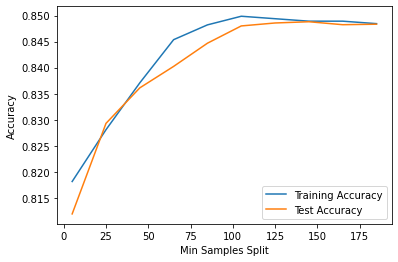

In [33]:
plt.plot(scores['param_min_samples_split'], scores['split0_test_score'], label='Training Accuracy')
plt.plot(scores['param_min_samples_split'], scores['mean_test_score'], label='Test Accuracy')

plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

In [34]:
parameters_grid = {
    'max_depth': range(5,15,5),
    'min_samples_leaf': range(50,150,50),
    'min_samples_split': range(50,150,50),
    'criterion': ['entropy', 'gini']
}

dtree = DecisionTreeClassifier()

gs = GridSearchCV(dtree, param_grid=parameters_grid, cv=5, scoring='accuracy')

gs.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='accuracy')

In [35]:
scores = gs.cv_results_

scores = pd.DataFrame(scores)

scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.069878,0.015725,0.004710,0.001077,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.838977,0.844660,0.843476,0.845571,0.847229,0.843983,0.002787,11
1,0.059235,0.005849,0.004317,0.000747,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.838977,0.844660,0.843476,0.845571,0.847229,0.843983,0.002787,11
2,0.060248,0.003651,0.004774,0.000701,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.838977,0.846081,0.842292,0.845571,0.846281,0.843840,0.002829,13
3,0.052527,0.005770,0.003403,0.001028,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.838977,0.846081,0.842292,0.845571,0.846281,0.843840,0.002829,13
4,0.078345,0.008210,0.003805,0.001916,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.848449,0.848923,0.838977,0.845571,0.853861,0.847156,0.004882,7
5,0.091594,0.006913,0.004505,0.000446,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.848449,0.848923,0.838977,0.845571,0.853861,0.847156,0.004882,7
6,0.088227,0.006254,0.004533,0.001136,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.850343,0.854606,0.841345,0.844860,0.855282,0.849287,0.005441,5
7,0.093341,0.011204,0.003885,0.000779,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.850343,0.854606,0.841345,0.844860,0.855282,0.849287,0.005441,5
8,0.053071,0.001560,0.004112,0.001399,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.838977,0.844660,0.843476,0.845571,0.847939,0.844125,0.002961,9
9,0.055501,0.003119,0.004218,0.000937,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.838977,0.844660,0.843476,0.845571,0.847939,0.844125,0.002961,9


In [36]:
gs.best_score_

0.8497608066089997

In [37]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)

In [38]:
dt = DecisionTreeClassifier(criterion='gini',
                           random_state=102,
                           max_depth=10,
                           min_samples_leaf=50,
                           min_samples_split=50)

dt.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=102)

In [39]:
dt.score(xtest, ytest)

0.8461708476074704

In [40]:
dt = DecisionTreeClassifier(criterion='gini',
                           random_state=102,
                           max_depth=10,
                           min_samples_leaf=100,
                           min_samples_split=50)

dt.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=102)

In [41]:
dt.score(xtest, ytest)

0.8476074704387225

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

ypred = model.predict(xtest)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      6776
           1       0.79      0.50      0.61      2273

    accuracy                           0.84      9049
   macro avg       0.82      0.73      0.76      9049
weighted avg       0.84      0.84      0.83      9049



In [43]:
confusion_matrix(ytest, ypred)

array([[6467,  309],
       [1128, 1145]], dtype=int64)

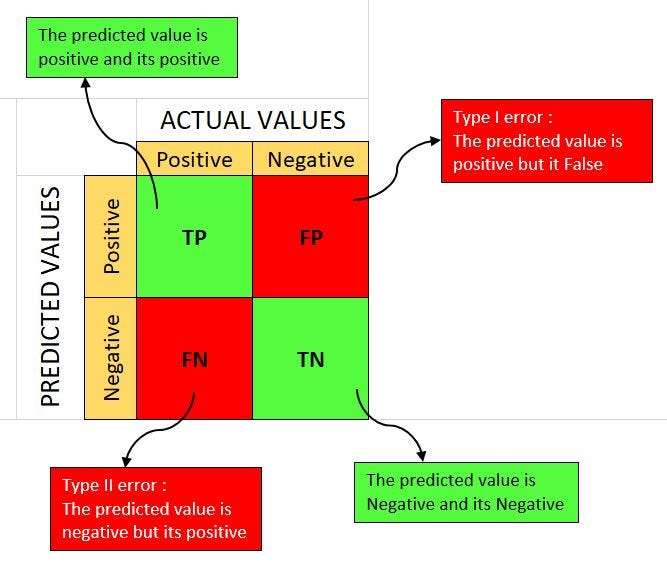

Class Imbalance

https://medium.com/@okanyenigun/handling-class-imbalance-in-machine-learning-cb1473e825ce